<div align="right">Python 2.7 Jupyter Notebook</div>

# Data Considerations

### Your completion of the Notebook exercises will be graded based on your ability to:

> **Apply**: Are you able to execute code, using the supplied examples, that perform the required functionality on supplied or generated data sets? 

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

> **Create**: Your ability to produce notebooks that serve as computational record of a session that can be used to share your insights with others? 

# Notebook introduction

Working with data helps you to make informed decisions. There are loads of articles and content available around the topic of being "data driven". There have also been technology and systems development best practices for a couple of decades, many of which contain great input and guidelines.

One of the biggest problems we are facing with tools, technology and best practices is the rate of change. David Shrier discusses the concept of the half-life of data in video 4. The half-life of tools, technologies and best practices in the information technology space is also becoming shorter and shorter.

The fact that you have enrolled for this course demonstrates that you see value in data driven approaches and the opportunities that advances in technology brings. As you continue your journey, you will discover additional sources of information such as the rich communities on [GitHub](https://github.com/search?utf8=%E2%9C%93&q=data+science) where users share code and learn from others.

This notebook will work through an example containing data from the students enrolled in this course. In many cases you will need to enrich your existing datasets, as changing the collection process is not always an option. This notebook demonstrates how country and city locations (text) can be utilized to geocode cities to locations that can be plotted on a map. 

While you should not share answers with classmates, you should feel free to ask for assistance and post examples and syntax structures that you have found helpful on the forums.

> **Note**: 

> We strongly recommend that you save a checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.

#### Load libraries and set options

In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib
import folium
import geocoder
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


## 1. Introduction to Geocoding
Geocoding is the process of transforming a description of a location to a spatial location on the surface of the earth. 

### 1.1 Geocoder
There are several geocoding libraries and services available. In this notebook will demonstrate the use of the [Geocoder](https://pypi.python.org/pypi/geocoder/) Python library, using [Google Maps](https://maps.google.com) as provider.

We start by geocoding a single city and country combination. You can change the values of the city if you wish.

In [3]:
# Let's geocode a city in the format of the data set that we have available
g = geocoder.google('Chongqing, China')

# Print the lattitude and longitude for the city
g.latlng

[29.56301, 106.551556]

You can use the same library to find the location based on IP addresses. When executing this on your virtual analysis environment, the location of the server will be returned.

In [4]:
# Find your location based on your IP address
mylocation = geocoder.ip('me')

# print your location
mylocation.latlng

[45.8399, -119.7006]

### 1.2 Input data: Student location

We have extracted an earlier snapshot of the current student group, allocated a new id and included industry, country and city. This information is visible on the online campus, however, please  do not share this outside of the forum. The intention here is to show you what can be achieved with minimal input. 

#### 1.2.1 Load the data

In [5]:
# Load student location data and display the header
df = pd.read_csv('students_raw.csv')
df.head()

,id,industry,country,city
0,10001,Agriculture,United States,Davis
1,10002,Arts & Education,Australia,Perth
2,10003,Arts & Education,Austria,Lieboch
3,10004,Arts & Education,Brazil,São Paulo
4,10005,Arts & Education,Canada,Georgetown


Consider the forms and applications that you complete regularly. You may be happy to share your personal information with the company providing you with a product or service, but you will likely not be happy if they start sharing the information publicly. Many people provide this data in social media on public forums and do not necessarily think about the potential consequences. 

One of the techniques to hide sensitive data is to only release aggregated data. The biggest problem with this approach is that you are still able to identify persons in low density areas of the data set. You need to be extremely careful when designing applications that utilize personal data to ensure that you do not breach the trust of the users who supplied you with their data.

We have removed names, surnames, telephone numbers, and email addresses, but many of you would still be able to provide an accurate guess about the random id allocated to you in dataset, df in 1.2.1, based on the examples below.


#### 1.2.2 Prepare the data

In [6]:
# Step 1: Group the data to hide the user id
df1 = pd.DataFrame(df.groupby(['country', 'city', 'industry'])['id'].count()).reset_index()
df1 = df1.rename(columns = {'id':'student_count'})
df1.head(10)

,country,city,industry,student_count
0,Australia,Adelaide,Other or Unknown,1
1,Australia,Bronte,Other or Unknown,1
2,Australia,Buddina,ICT,1
3,Australia,Carlingford,ICT,1
4,Australia,Glen Waverley,ICT,1
5,Australia,Haberfield,ICT,1
6,Australia,Kellyville,Other or Unknown,1
7,Australia,Kogarah Bay,Other or Unknown,1
8,Australia,Logan,Other or Unknown,1
9,Australia,Manly,Other or Unknown,1


#### 1.2.3 Retrieve data for a specific city

In [9]:
# Return all rows for New York
df1.loc[df1['city'] == 'Toronto']

,country,city,industry,student_count
86,Canada,Toronto,Arts & Education,3
87,Canada,Toronto,Engineering,1
88,Canada,Toronto,Finance & Insurance,2
89,Canada,Toronto,Legal Services,1
90,Canada,Toronto,Other or Unknown,4
91,Canada,Toronto,Public Sector,1


#### 1.2.4 Plot students per country

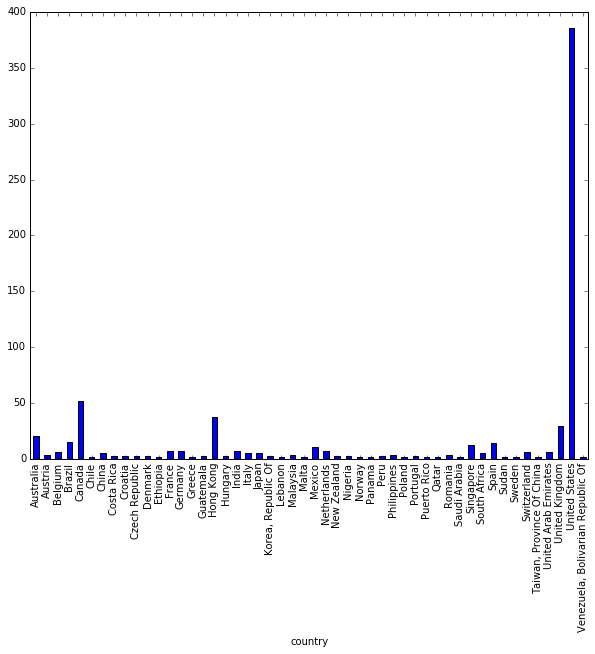

In [10]:
# Plot the count of students per country
country_counts = df1.groupby(['country'])['student_count'].count()
country_counts.plot(kind='bar')

#### 1.2.5 Plot students per industry

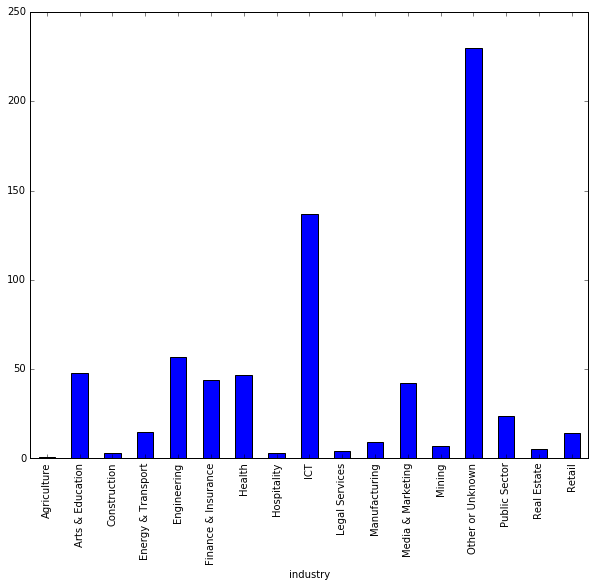

In [11]:
# Plot the count of students per industry
industry_counts = df1.groupby(['industry'])['student_count'].count()
industry_counts.plot(kind='bar')

#### 1.2.6 Exercise: Plot the count of students per city for a specific country

1. Create a dataframe with the list of cities present in this data set in your country. Should the dataset be too sparsely or densely populated for your country, you are welcome to select another. Use the variable name "df3" for your subset.

2. Create a bar plot for the cities in this country, indicating the number of students in each city.

> **Hint**: create a new subset of the dataset first: new_ds = df.loc[df['column'] == 'value']

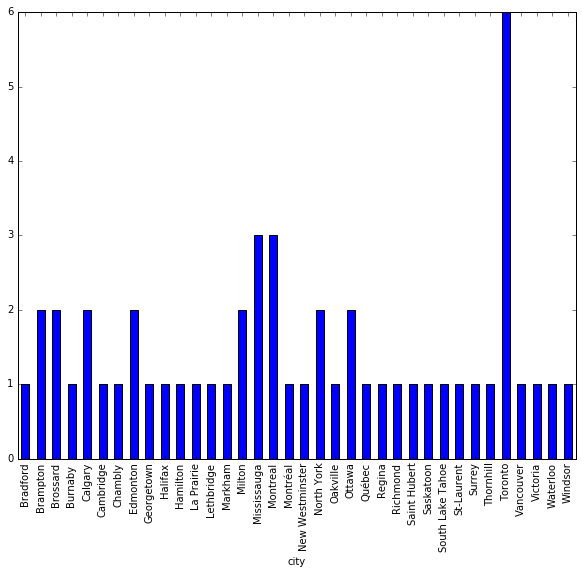

In [18]:
# your code here
df3 = df1.loc[df1['country'] == 'Canada']
city_counts = df3.groupby(['city'])['student_count'].count()
city_counts.plot(kind='bar')



> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

#### 1.2.7 Prepare the dataframe for geocoding

In [19]:
# We tested the geocoder library with town and country as input. Let's create a new column in our dataframe that contains these values.
df1['geocode_input'] = df1['city'] + ', ' + df1['country']

# We also create two additional columns for lattitude and longitude.
df1['lat'], df1['long'] = [0, 0]

# Display the head of the updated dataframe.
df1.head()

,country,city,industry,student_count,geocode_input,lat,long
0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",0,0
1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",0,0
2,Australia,Buddina,ICT,1,"Buddina, Australia",0,0
3,Australia,Carlingford,ICT,1,"Carlingford, Australia",0,0
4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",0,0


### 1.3 Geocoding the data

Next, you will geocode cities in the student registrations list in order to display the locations on a map.

You are welcome to execute the cell below, but it is not required. This cell will run through a loop and geocode each of the city and country combinations provided as input. This process may take up to 5 minutes. The response is influenced by the target server capacity.

On a course such as this one where there is a large number of students, you may experience a delay in response. We use this opportunity to demonstrate how you can save intermediary results as an output file, which you can load when resuming your analysis at a later stage without having to redo all the processing.

Should you choose not to execute the cell, you will have to retrieve the geocoded dataset in the cell that follows.

In [20]:
# Now we use Geocoder in a loop to gecode the cities and update our dataframe
# Wait until the In{*} indicator on the lefthand side changes to a number before proceeding

for i in range(len(df1)):
    g = geocoder.google(df1.loc[i,'geocode_input'])
    df1.ix[i,'lat'] = g.lat
    df1.ix[i,'long'] = g.lng
print 'Geocoding complete!'

Geocoding complete!


If you selected to execute the cell above, please wait for it to complete. The "In[ ]" will show "In[*]" while being executed and will change to "In[number]" when complete. If this step has been completed successfully, you do not have to load the dataset in the following cell. Should you choose to execute the cell, no harm will be done, you will simply overwrite your geocoded dataset with the supplied geocoded dataset.

If you selected not to execute the cell above, you will need to execute the cell below to retrieve the dataset that we have already geocoded for you in order to proceed.

In [21]:
# Load geocoded dataset if you chose not to execute
df1 = pd.read_csv('grouped_geocoded.csv',index_col=0)

In [22]:
# Let's look at the dataframe again to see the populated values for latitude and longitude.
df1.head()

,country,city,industry,student_count,geocode_input,lat,long
0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",-34.928499,138.600746
1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",-33.905320,151.260690
2,Australia,Buddina,ICT,1,"Buddina, Australia",-26.690000,153.134000
3,Australia,Carlingford,ICT,1,"Carlingford, Australia",-33.777000,151.048000
4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",-37.885652,145.165179


### 1.4 Saving and retrieving your resultset to CSV
In some cases you would want to save result sets. You can utilise this technique to store copies of intermediary results where you do not wish to perform the calculations again when resuming your analysis or to output the result to be shared or utilized in other applications. In this example we demonstrate saving the file as CSV in the current working direcotory, "module_1".

In [23]:
# To save the output to a file you can use the command below and replace "filename_export" with a name of your choice.
df1.to_csv('filename_export.csv')

In [24]:
# To load the file you just generated, you can replace the filename below with the one you entered in the previous cell.
# Create a new Pandas dataframe with the file created in the previous cell.
new_df = pd.read_csv('filename_export.csv')

### 1.5 Plotting the geocoded data on a map

You can visit the Folium [documentation](http://folium.readthedocs.io/en/latest/) or browse the [GitHub](https://github.com/python-visualization/folium) repository for further instructions and examples.

Feel free to change the map and try to visualize the count of students per country or the count of students per industry per country.

In [25]:
# Set map center and zoom level
mapc = [0, 30]
zoom = 2

# Create map object
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)
# Plot each of the locations that we geocoded
for j in range(len(df1)):
    folium.Marker([df1.ix[j,'lat'], df1.ix[j,'long']],
        icon=folium.Icon(color='green',icon='info-sign')
        ).add_to(map_osm)
# Plot your server location
folium.CircleMarker(mylocation.latlng,
              radius=500000,
              popup='My Server Location',
              fill_color='#3186cc'
             ).add_to(map_osm)
# Show the map
map_osm

In [26]:
# Feel free to experiment here with mapping options
# You can copy and paste the code from the cell above and change markers, zoom level or add additional features demonstrated on the Folium site.
# Set map center and zoom level
mapc = [0, 30]
zoom = 2

# Create map object
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)
# Plot each of the locations that we geocoded
for j in range(len(df1)):
    folium.Marker([df1.ix[j,'lat'], df1.ix[j,'long']],
        icon=folium.Icon(color='red',icon='info-sign')
        ).add_to(map_osm)
# Plot your server location
folium.CircleMarker(mylocation.latlng,
              radius=100000,
              popup='My Server Location',
              fill_color='#3186cc'
             ).add_to(map_osm)
# Show the map
map_osm











## 2. Visualizing your analysis

In the previous notebook, the markdown mechanism was introduced briefly. This is the mechanism that has been used to provide instructions and images to you in the practical notebooks.

You can select "Help" and then "Markdown" in the Jupyter menu at the top of the screen to take you to additional links.

Use a couple of the cells below to demonstrate to your tutor that you are able to communicate your ideas using this mechanism. You can state the intention, describe your steps, include code and comments, as well as visualizations in the cells below.

### 2.1 Activity: Getting comfortable with Markdown

Notebook documents contain the inputs and outputs of an interactive session as well as additional text that accompanies the code but is not meant for execution. In this way, notebook files can serve as a complete computational record of a session. To this purpose we would like you to complete the section below using a combination of markdown instructions and code. The content that you submit will not be evaluated critically, but we would like you display the ability to master the basics of Markdown as listed in the section below.

Limit the time you spend on this activity, as the tutors will only assess whether you are able to perform the basics. One or two sentences for each section is sufficient as long as you demonstrate each of the following features:
- Markdown cell containing a combination of heading, text, lists, and images or hyperlinks.
- Markdown cell containing a link or image.
- Code cell with no output (for example, load library) that contains comments in the cell describing the function of the cell.
- Code cell with output (for example, df.head() or a calculation).
- Code cell that produces a graph or plot.

You can make use of sections in previous notebooks, source external components (with references) or generate your own content.

You can also obtain additional help from the Jupyter menu bar at the top of this notebook, under "Help", "Markdown" or review the [Jupyter Markdown Documentation link]( http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Working%20With%20Markdown%20Cells.ipynb).

> **Note**: 

> Ensure that the cell type is "Markdown" in the menu bar above and that you "Execute" the markdown cells before saving, downloading, and submitting your notebook to the online campus. Should you need to edit a markdown cell after executing, you can double-click in the white space on the left of the cell.

Feel free to add additional cells in the section below should you have the need to do so.

#### 2.1.1 Collection

# Collection
1. The action or process of collecting someone or something.
2. Source: https://translate.google.ca/?hl=en&tab=wT#en/zh-CN/collection

#### 2.1.2 Pre-Processing

<img src="../module_1/Translation.png" />

#### 2.1.3 Hygiene

In [ ]:
# %load Hygiene.txt
conditions or practices conducive to maintaining health and preventing disease, especially through cleanliness

#### 2.1.4 Analysis

In [32]:
print "detailed examination of the elements or structure of something, typically as a basis for discussion or interpretation"

detailed examination of the elements or structure of something, typically as a basis for discussion or interpretation


#### 2.1.5 Visualization

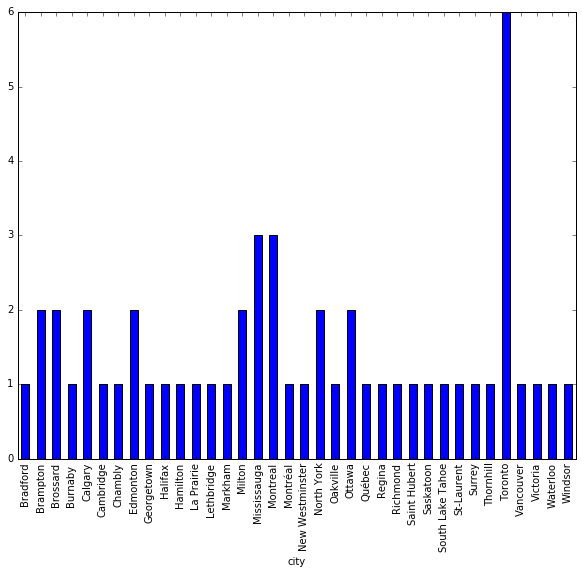

In [33]:
city_counts.plot(kind='bar')

#### 2.1.6 Interpretation

In [34]:
a = "the action of explaining "
b = "the meaning of something"
print a+b

the action of explaining the meaning of something


#### 2.1.7 Intervention

In [35]:
print "the action or process of intervening"

the action or process of intervening


## 3. Submit your notebook

Please make sure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as" and "IPython Notebook (.ipynb)";
- Submit a copy of this file to the online campus.